In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Acquisition and Preparation

In [44]:
## Load the dataset from kaggle from a CSV File
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Preprocess the data

In [45]:

### Drop irrelevant columns
data=data.drop(['Unnamed: 32','id'],axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
# check for null values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [47]:
#check for duplicate
data.duplicated().sum()

0

In [48]:
# The 'diagnosis' column was replaced (M is mapped to 1 and B to 0).
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
data

C:\Users\dupsy\AppData\Local\Temp\ipykernel_23592\2401311094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
C:\Users\dupsy\AppData\Local\Temp\ipykernel_23592\2401311094.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Exploratory Data Analysis (EDA)

In [49]:
# describe
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [56]:
## Encode categorical variables
label_encoder_diagnosis=LabelEncoder()
data['diagnosis']=label_encoder_diagnosis.fit_transform(data['diagnosis'])
data
# Save the preprocessed dataset
data.to_csv('preprocessed_breast_cancer.csv', index=False)

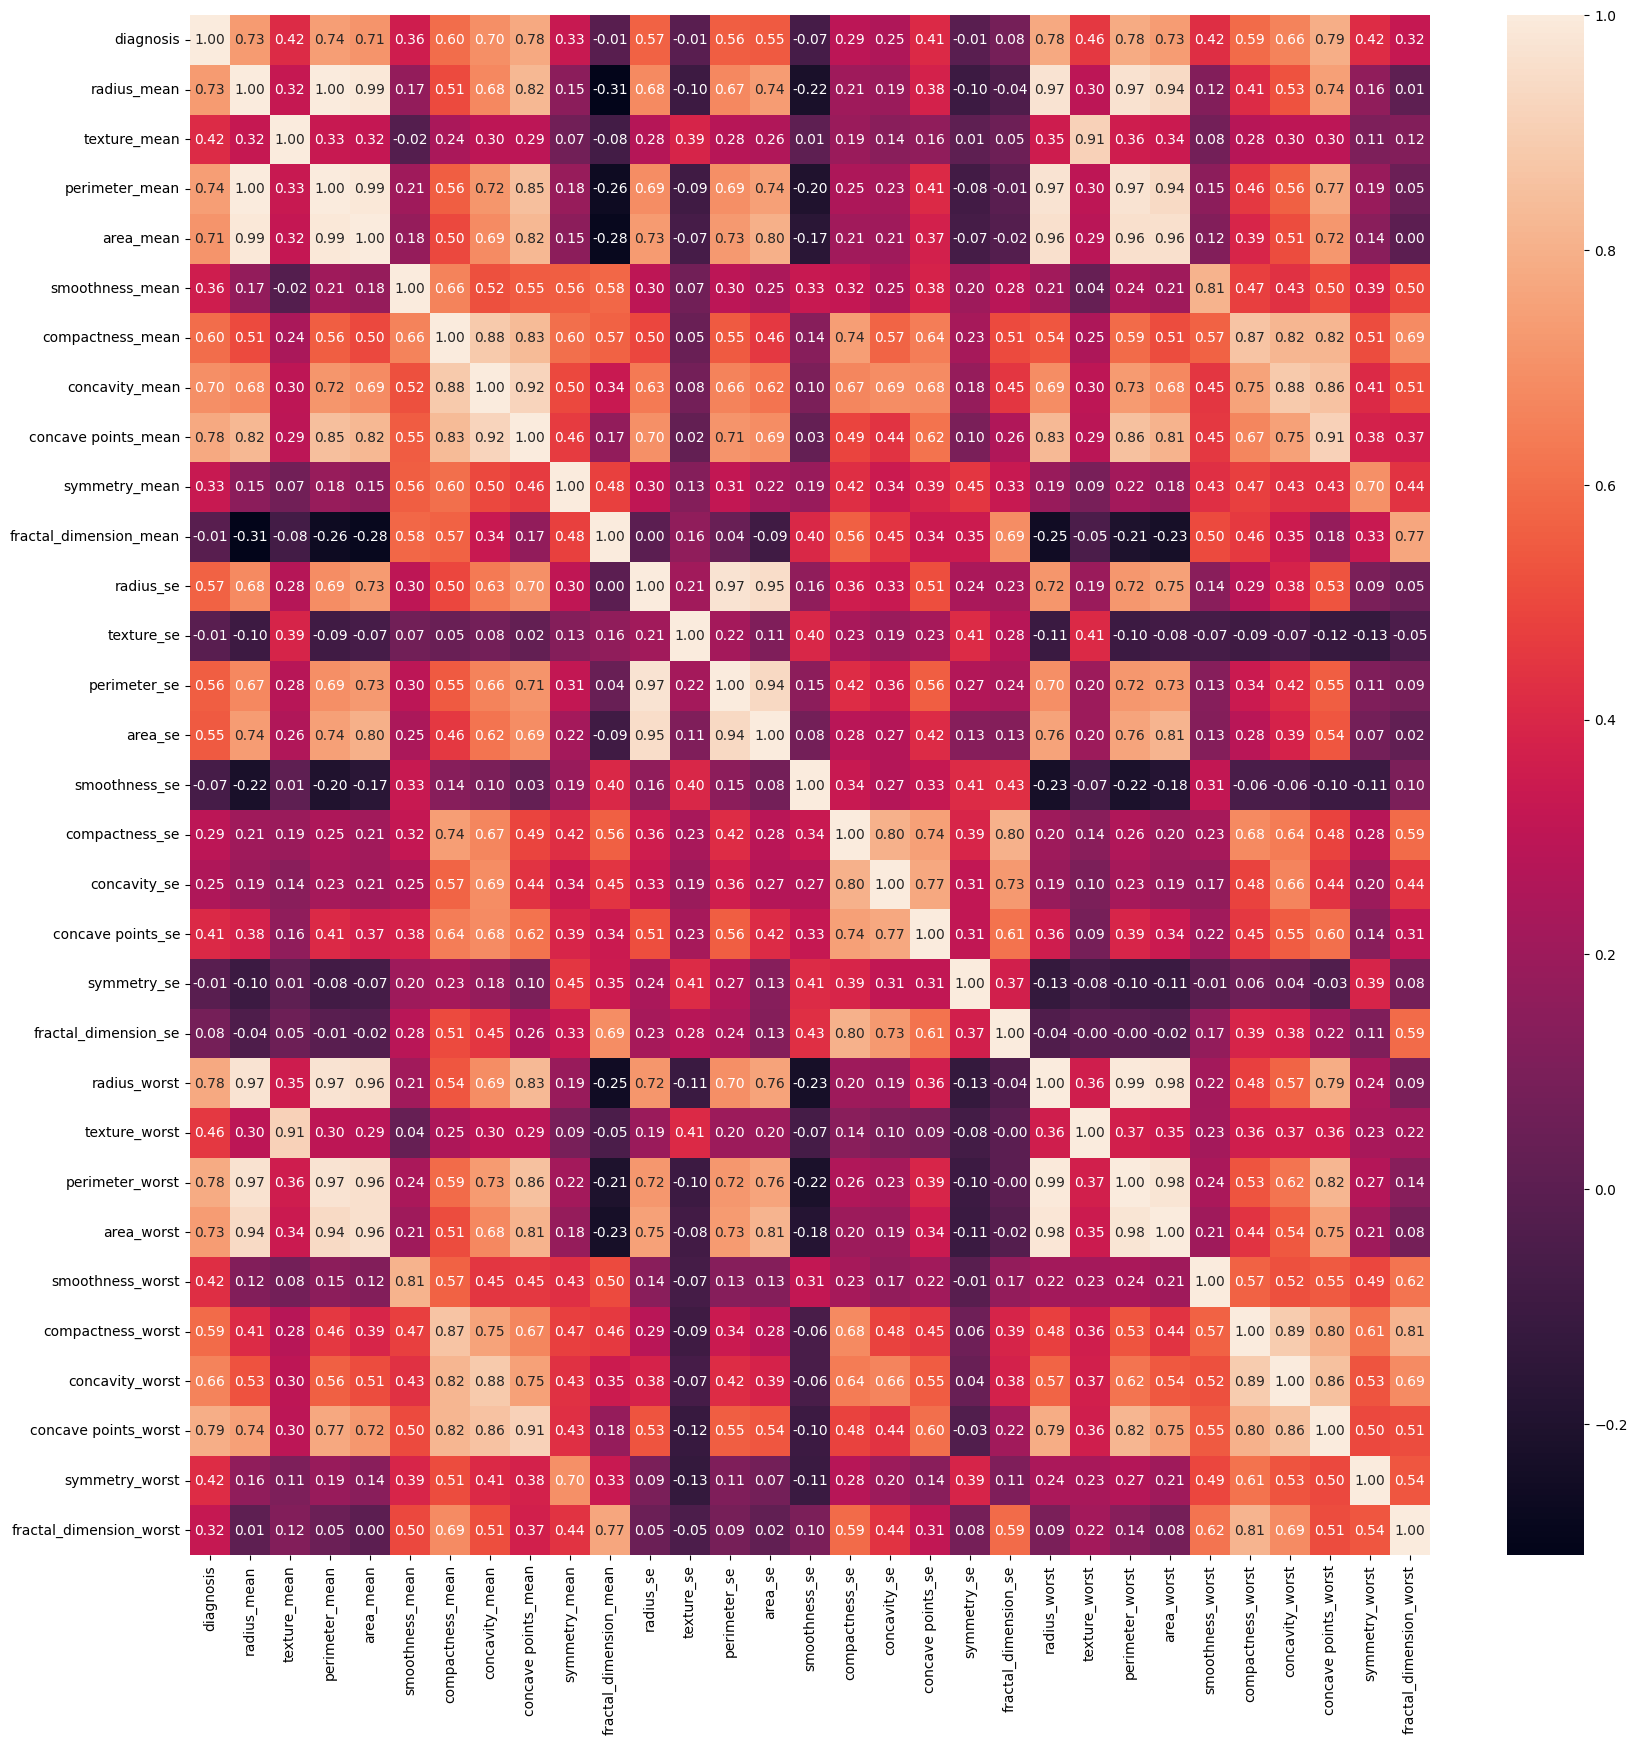

In [57]:
# Generate correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [58]:
## DiVide the dataset into independent and dependent features
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

## Split the data in training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\dupsy\AppData\Local\Temp\ipykernel_23592\389107078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


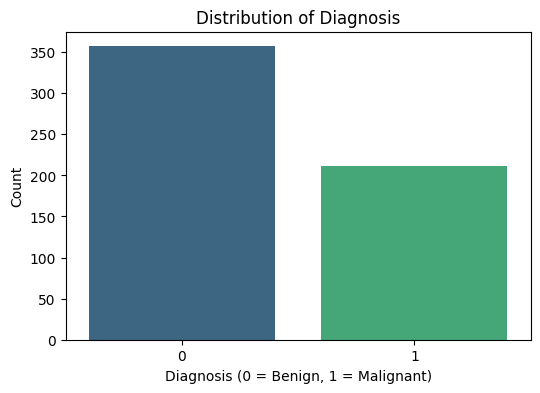

In [60]:

# Visualize the distribution of the target variable

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a count plot for the 'diagnosis' column with a 'viridis' color palette
sns.countplot(x='diagnosis', data=data, palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')

# Display the plot
plt.show()

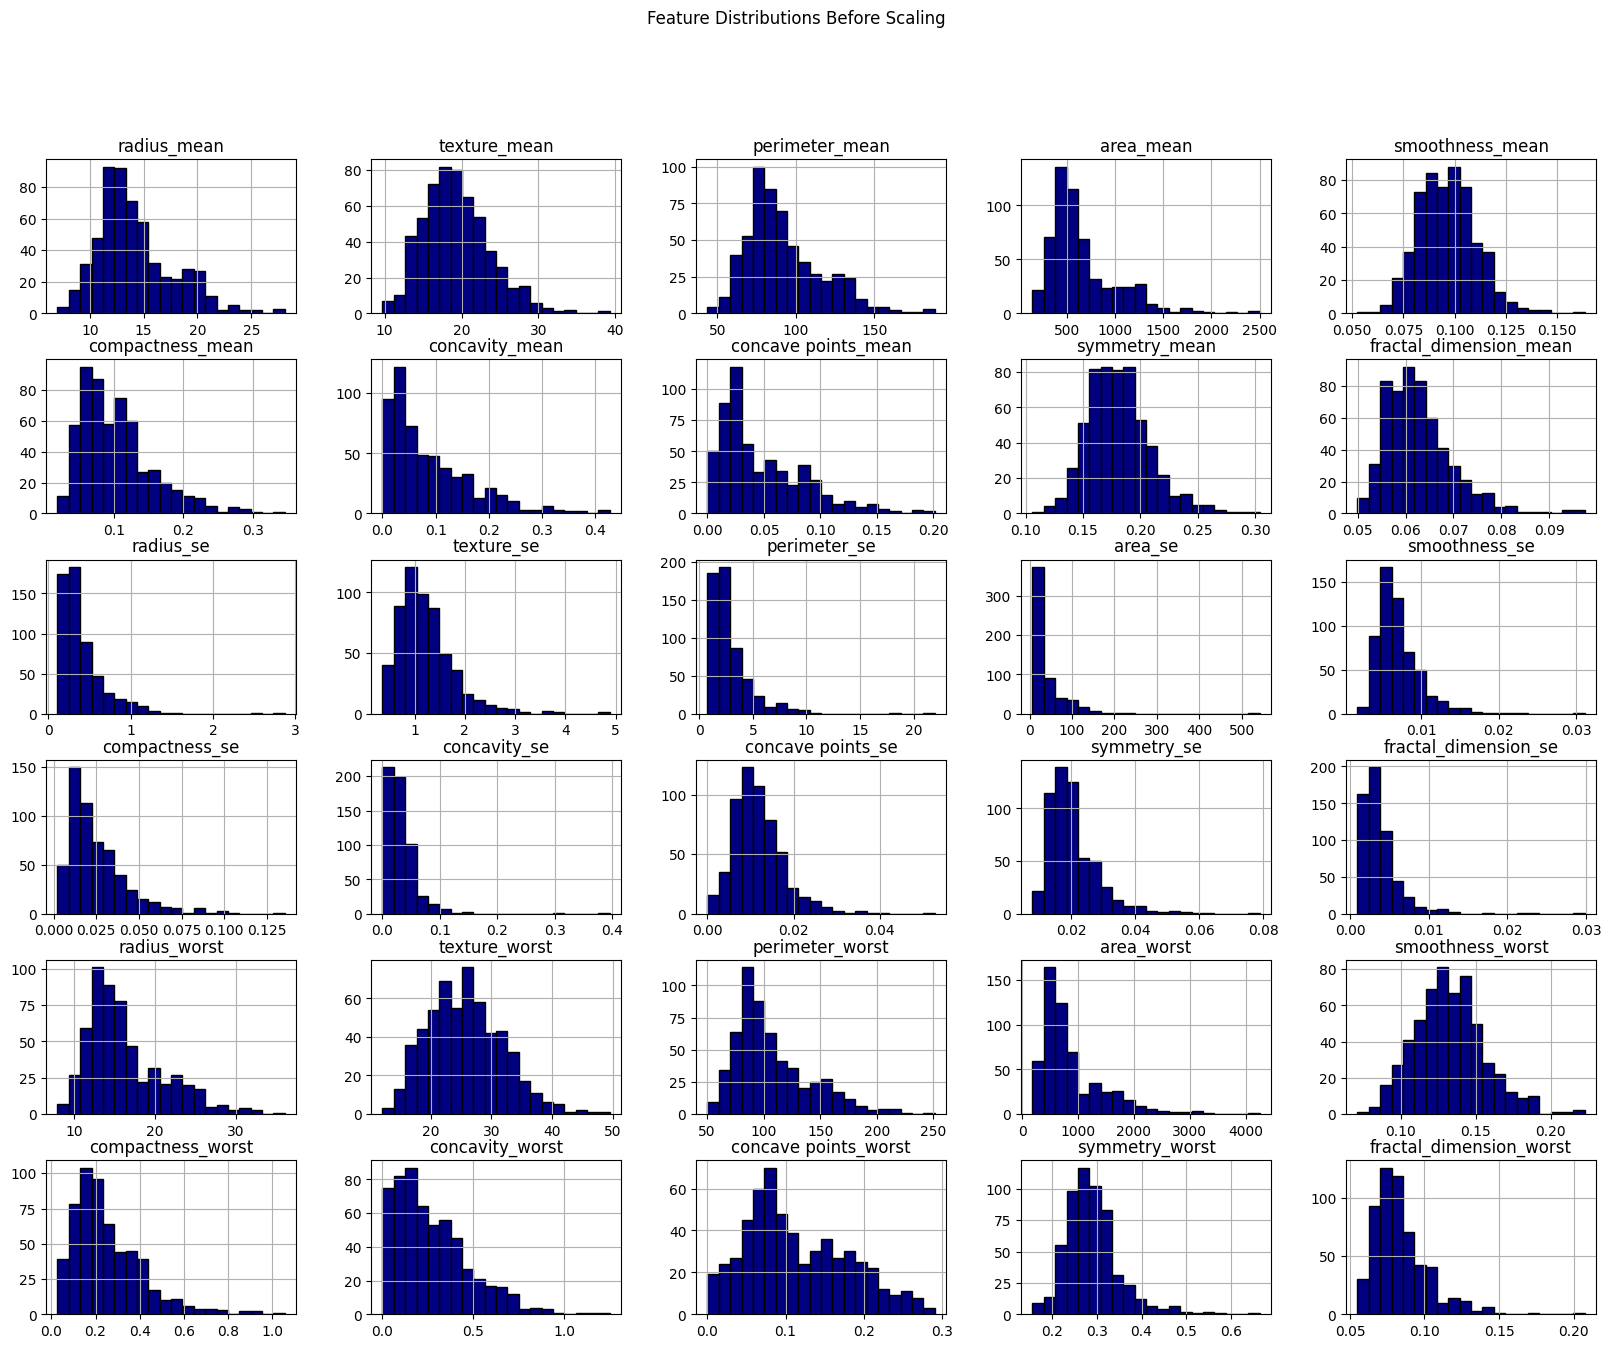

In [61]:

# Visualize feature distributions before scaling
X.hist(bins=20, figsize=(20, 15), color='navy', edgecolor='black')
plt.suptitle('Feature Distributions Before Scaling')
plt.show()

In [62]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

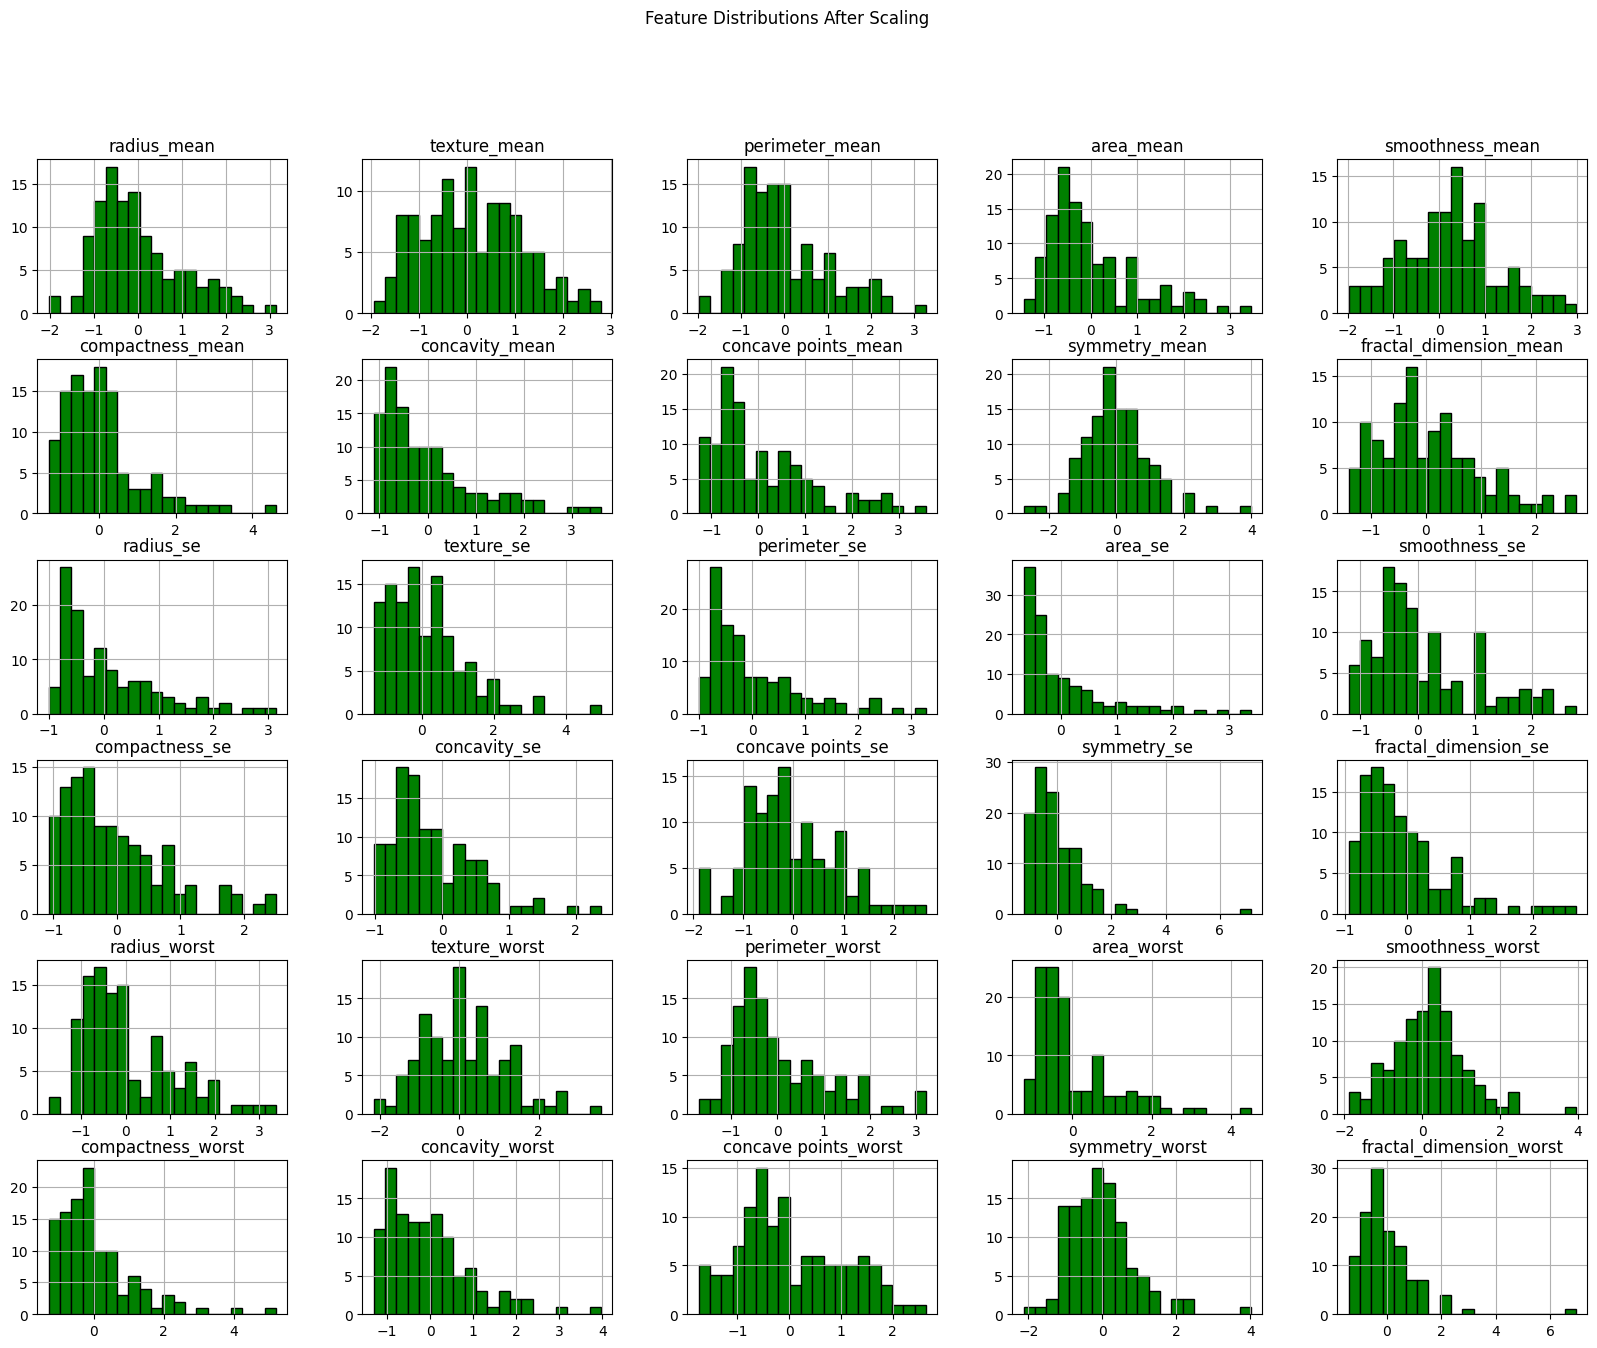

In [63]:
# Visualize feature distributions after scaling
X_scaled_df = pd.DataFrame(X_test, columns=X.columns)
X_scaled_df.hist(bins=20, figsize=(20, 15), color='green', edgecolor='black')
plt.suptitle('Feature Distributions After Scaling')
plt.show()

Pickle is a Python module that implements binary protocols for serializing and deserializing Python objects.

Purpose Pickle
Reusability: By saving these objects to files, you can reuse the fitted label_encoder_diagnosis and scaler without needing to refit them each time you run your code. This is useful for consistent preprocessing in different sessions or environments.

Efficiency: Loading a serialized object is faster than refitting it, which can save time, especially when dealing with large datasets or complex preprocessing steps.

Sharing: Serialized objects can be easily shared with others, allowing them to use the same preprocessing steps without needing access to the original data.



In [9]:
##pickle

pickle.dump(label_encoder_diagnosis, open('label_encoder_diagnosis.pkl','wb'))

pickle.dump(scaler,open('scaler.pkl','wb' )) 


Feature Selection

This process helps in reducing the dimensionality of the data, focusing on the most important features, and potentially improving the performance of machine learning models.

In [10]:
#Selecting the best Features

from sklearn.feature_selection import SelectKBest, f_classif

def select_features(X_train, y_train, X_test, k=10):
    fs = SelectKBest(score_func=f_classif, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Assuming the preprocessed data is saved in variables X_train, y_train, X_test
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


In [11]:
# Save the best features selected
with open('feature_selector.pkl', 'wb') as f:
    pickle.dump(fs, f)

# Save the selected features data
with open('selected_features_data.pkl', 'wb') as f:
    pickle.dump((X_train_fs, X_test_fs, y_train, y_test), f)

Model Building and Grid Search CV for Model Tuning

In [12]:
#import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def grid_search_cv(X_train, y_train):
    parameter_space = {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    }

    mlp = MLPClassifier(max_iter=100)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
    clf.fit(X_train, y_train)

    print('Best parameters found:\n', clf.best_params_)
    return clf

In [13]:

# load selected features data is saved in variables X_train_fs, y_train
with open('selected_features_data.pkl', 'rb') as f:
    X_train_fs, X_test_fs, y_train, y_test = pickle.load(f)
clf = grid_search_cv(X_train_fs, y_train)
#saved the trained model

# clf is trained MLPClassifier model
import joblib
from sklearn.neural_network import MLPClassifier

joblib.dump(clf, 'clf_model.pkl')

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


c:\ANN ASSIGNMENT\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


['clf_model.pkl']

 Implementing an Artificial Neural Network (ANN) Model

 Assess the performance of an ANN classifier on a test dataset using accuracy 

In [14]:
#Model Evaluation
from sklearn.metrics import classification_report, accuracy_score

def train_evaluate_ann(X_train_fs, y_train, X_test_fs, y_test, clf):
    y_pred = clf.predict(X_test_fs)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Train and evaluate the model using the breast cancer dataset

In [15]:

# Assuming the grid search CV model is saved in variable clf
train_evaluate_ann(X_train_fs, y_train, X_test_fs, y_test, clf)

Accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions

In this case, the accuracy is approximately 98.25%, meaning that the classifier correctly predicted the labels for about 98.25% of the test samples.